<a href="https://colab.research.google.com/github/Gaurav37/NLP/blob/main/NLPProjectDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/

/content


In [ ]:
%pwd

'/content'

In [ ]:
!wget https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v2.0.json
!wget https://rajpurkar.github.io/SQuAD-explorer/dataset/dev-v2.0.json

--2020-12-19 03:46:58--  https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v2.0.json
Resolving rajpurkar.github.io (rajpurkar.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to rajpurkar.github.io (rajpurkar.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42123633 (40M) [application/json]
Saving to: ‘train-v2.0.json’

train-v2.0.json     100%[===================>]  40.17M  85.7MB/s    in 0.5s    

2020-12-19 03:46:59 (85.7 MB/s) - ‘train-v2.0.json’ saved [42123633/42123633]

--2020-12-19 03:46:59--  https://rajpurkar.github.io/SQuAD-explorer/dataset/dev-v2.0.json
Resolving rajpurkar.github.io (rajpurkar.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to rajpurkar.github.io (rajpurkar.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4370528 (4.2M) [application/json]
Saving to: ‘dev-v2.0.json’

dev-v2.0.json       

In [ ]:
#%rm dev-v2.0.json
%ls

dev-v2.0.json  sample_data/  train-v2.0.json


In [ ]:
import pandas as pd
df=pd.read_json(r'train-v2.0.json')
#df2=df.to_csv(r'train-v2.0.json')
#csvDf = df.to_csv(index=True)
#print(csvDf)

#topic=df.iloc[0,0]
#print(topic)
#df.drop(['version'], axis=1)
df_train=df['data']
#print(df['v'])
print(df_train)

0      {'title': 'Beyoncé', 'paragraphs': [{'qas': [{...
1      {'title': 'Frédéric_Chopin', 'paragraphs': [{'...
2      {'title': 'Sino-Tibetan_relations_during_the_M...
3      {'title': 'IPod', 'paragraphs': [{'qas': [{'qu...
4      {'title': 'The_Legend_of_Zelda:_Twilight_Princ...
                             ...                        
437    {'title': 'Infection', 'paragraphs': [{'qas': ...
438    {'title': 'Hunting', 'paragraphs': [{'qas': [{...
439    {'title': 'Kathmandu', 'paragraphs': [{'qas': ...
440    {'title': 'Myocardial_infarction', 'paragraphs...
441    {'title': 'Matter', 'paragraphs': [{'qas': [{'...
Name: data, Length: 442, dtype: object


In [ ]:
!pip install --upgrade spacy==2.2.0 allennlp==0.9.0
import spacy
print(spacy.__version__)

     |████████████████████████████████| 10.2MB 4.5MB/s 
     |████████████████████████████████| 7.6MB 37.9MB/s 
     |████████████████████████████████| 2.1MB 35.2MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 5.3MB 41.1MB/s 
     |████████████████████████████████| 266kB 49.3MB/s 
     |████████████████████████████████| 133kB 47.3MB/s 
     |████████████████████████████████| 163kB 47.2MB/s 
     |████████████████████████████████| 133kB 50.3MB/s 
     |████████████████████████████████| 245kB 49.0MB/s 
     |████████████████████████████████| 317kB 44.1MB/s 
     |████████████████████████████████| 245kB 49.8MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 1.1MB 42.8MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 7.1MB 32.9MB/s 
  

In [ ]:
def formatter(df):

  context=[]
  questions=[]
  answers_text=[]
  answers_start=[]
  title=[]
  for i in range(0,442):
    topic=df[i]['paragraphs']
    title_=df[i]['title']
    for sub_para in topic:
      for q_a in sub_para['qas']:
        questions.append(q_a['question'])
        if len(q_a['answers'])>0:
          answers_start.append(q_a['answers'][0]['answer_start'])
          answers_text.append(q_a['answers'][0]['text'])
        else:
          answers_start.append(None)
          answers_text.append(None)
        context.append(sub_para['context'])
        title.append(title_)
  return context,questions, answers_text, answers_start,title

# rows = zip(formatter(df['data']))


In [ ]:
#Commenting out as of now as we might not convert it to csv format 
#rows = zip(formatter(df_train))
# import csv
# with open("train.csv", "w") as f:
#     writer = csv.writer(f)
#     for row in rows:
#         writer.writerow(row)


In [ ]:
context,questions,answers_text,answers_start,title=formatter(df_train)

In [ ]:
#Remove punctuations from tokens if any
#However, Spacy removes punctuations automatically as seen in testing cell
def rem_punct(sentence):
  punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  no_punct=""
  for char in sentence:
    if char in punctuations:
        no_punct = no_punct + " "
    else:
      no_punct =no_punct + char
  return no_punct

title_nopunc=[]
for i in range(0, len(title)):
  title_nopunc.append(rem_punct(title[i]))
print(title_nopunc)

## NER NEXT

['Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé', 'Beyoncé'

In [ ]:
nlp = spacy.load("en_core_web_sm")
def ner(topic):
  
  doc = nlp(topic)
  entities = []
  labels = []
  # position_start = []
  # position_end = []

  for ent in doc.ents:
    entities.append(ent)
    labels.append(ent.label_)
    # position_start.append(ent.start_char)
    # position_end.append(ent.end_char)
    #ner = pd.DataFrame({'Entities':entities,'Labels':labels})#,'Position_Start':position_start, 'Position_End':position_end})
  return entities, labels



In [ ]:
#calling ner method for every value in context list
import math

ent_context=[]
lab_context=[]
# ent_context2=[]
# lab_context2=[]
limit=math.floor(len(context)*0.75)
print(limit)
for i in range(0,limit):#,len(context)):
  c1,c2=ner(context[i])
  ent_context.append(c1)
  lab_context.append(c2)
  if i%20==0:
    print(i)


In [ ]:
#Wait till number becomes 97728
# CREATING TOPIC_LABELS ie lab_title
lab_title=[]
counter=0
for i in range(0,len(ent_context)):
  if len(ent_context[i])<1:
    lab_title.append(title_nopunc[i])
  else:
    for j in range(0,len(ent_context[i])):
      if title_nopunc[i] == str(ent_context[i][j]):
        lab_title.append(str(lab_context[i][j]))
        break
      else:
        if (j==len(ent_context[i])-1):
          lab_title.append(title_nopunc[i])
        else:
          counter+=1
# here we are putting title values in lab_title if either spacy context has no value 

In [ ]:
#Lets join question and answers so that in cases where spacy doesn't recognize 
print(answers_text[1])
answers_text, questions
ques_ans=[]
for i in range(0,len(questions)):
  ques_ans.append(str(questions[i])+ " " + str(answers_text[i]))
# abc=['abc','def','ghi']
# de=['ijk','lmn','opq']
# ef=[]
# for i in range(0,len(abc)):
#   ef.append(abc[i] + " " + de[i])
# print(ef[0])

# print(answers_text[0])
# for i in range(0,10):
#   print(ques_ans[i])

#Now lets pass the questions and answers_text combo to ner

ent_ques_ans=[]
lab_ques_ans=[]
# ent_context2=[]
# lab_context2=[]
limit=math.floor(len(ques_ans)*0.75)
print(limit)
for i in range(0,limit):#,len(context)):
  c1,c2=ner(ques_ans[i])
  ent_ques_ans.append(c1)
  lab_ques_ans.append(c2)
  if i%4==0:
    print(i)

In [ ]:
print(ent_ques_ans[8176])

[]


In [ ]:
#We have title_labels. Now is time for labeling questions
#print(stringent_context[0]).index(title[0]))
# print(ent_context[8177])
# print(lab_context[8175])
print(len(ent_context))
print(len(lab_title))
print(counter)
print(title_nopunc.index("Prime minister"))
print(context[8176])


# print(type(title[0]))
# print(len(str(ent_context[0][8])))

# print("Hi")
# for i in range(0, len(ent_context[8176])):
#   print("I am here")
#   if str(ent_context[8176][i])==title[8176]:
#     print("yes")
#   else:
#     print(ent_context[8176][i],"title", title[8176])

97739
97739
960967
8176
A prime minister is the most senior minister of cabinet in the executive branch of government, often in a parliamentary or semi-presidential system. In many systems, the prime minister selects and may dismiss other members of the cabinet, and allocates posts to members within the government. In most systems, the prime minister is the presiding member and chairman of the cabinet. In a minority of systems, notably in semi-presidential systems of government, a prime minister is the official who is appointed to manage the civil service and execute the directives of the head of state.


In [ ]:
#df2['ent_context'].isnull().sum()
#print(df2.loc[[8176]])
#df2.loc[df2['ent_context'] == ' ']

print(title_nopunc[0])
print(lab_title[0])
print(ent_context[0])
print(lab_context[0])
print(ent_ques_ans[0])
print(lab_ques_ans[0])
print(len(ent_ques_ans))

null_ent_context_index=[]
null_ent_ques_ans_index=[]
for i in range(0,97739):
  if not ent_ques_ans[i]:
    null_ent_ques_ans_index.append(i)
  if not ent_context[i]:
    null_ent_context_index.append(i)
print(null_ent_context_index)
print(null_ent_ques_ans_index)



Beyoncé
ORG
[September 4, 1981, American, Houston, Texas, the late 1990s, R&B, Mathew Knowles, one, Beyoncé, Love, 2003, five, Grammy Awards, Billboard Hot 100, one, "Crazy in Love" and "Baby Boy"]
['DATE', 'NORP', 'GPE', 'GPE', 'DATE', 'GPE', 'PERSON', 'CARDINAL', 'ORG', 'GPE', 'DATE', 'CARDINAL', 'EVENT', 'PRODUCT', 'CARDINAL', 'WORK_OF_ART']
[Beyonce, the late 1990s]
['PERSON', 'DATE']
97739
[4543, 4544, 4545, 4546, 4576, 4577, 4578, 4662, 4663, 4664, 4694, 4699, 4700, 4703, 4704, 4705, 4706, 4707, 4711, 4712, 4713, 4714, 5459, 5460, 5531, 5532, 5533, 5534, 5540, 5541, 5542, 5546, 5547, 5755, 5756, 6544, 6556, 6557, 6558, 6604, 6605, 6606, 6607, 6608, 6609, 6610, 6618, 6619, 6620, 6621, 6622, 6673, 6674, 6675, 6676, 6677, 6695, 6696, 6697, 6698, 6741, 6742, 6743, 6744, 6745, 6746, 6754, 6755, 6756, 6757, 6758, 6759, 6760, 6761, 6801, 6802, 6803, 6804, 6805, 6808, 6809, 6810, 6811, 6812, 6813, 6824, 6825, 6826, 6827, 6828, 6829, 6830, 6831, 6832, 6833, 6930, 6936, 6937, 6938, 7519, 7

In [ ]:
#print(question[6])
print(answers_text[6])
print(context[6])
print(ent_context[6][9])
print(lab_context[6][9])
print(title_nopunc[6])
print(lab_title[6])
print(lab_ques_ans[0][0])

#METHOD 1 FOR PLOTS - PLOTTING AMONGST LABELS- TOPIC LABELS VS QUES_ANS LABELS

labels=['PERSON','NORP','FAC','ORG','GPE','LOC','PRODUCT','EVENT','WORK_OF_ART','LAW','LANGUAGE','DATE','TIME','PERCENT','MONEY','QUANTITY','ORDINAL','CARDINAL']
# num_of_lab_title=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
# num_of_lab_quesans=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
num_Person_ques=[]
num_Norp_ques=[]
num_Fac_ques=[]
num_Org_ques=[]
num_Gpe_ques=[]
num_Loc_ques=[]
num_Product_ques=[]
num_Event_ques=[]
num_Workofart_ques=[]
num_Law_ques=[]
num_Language_ques=[]
num_Date_ques=[]
num_Time_ques=[]
num_Percent_ques=[]
num_Money_ques=[]
num_Quantity_ques=[]
num_Ordinal_ques=[]
num_Cardinal_ques=[]
count=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]# Number of topics of each label category
for i in range(0,97739):
  if lab_title[i]=='PERSON':
    num_Person_ques.append(lab_ques_ans[i])
    count[0]+=1
  elif lab_title[i]=='NORP':
    num_Norp_ques.append(lab_ques_ans[i])
    count[1]+=1
  elif lab_title[i]=='FAC':
    num_Fac_ques.append(lab_ques_ans[i])
    count[2]+=1
  elif lab_title[i]=='ORG':
    num_Org_ques.append(lab_ques_ans[i])
    count[3]+=1
  elif lab_title[i]=='GPE':
    num_Gpe_ques.append(lab_ques_ans[i])
    count[4]+=1
  elif lab_title[i]=='LOC':
    num_Loc_ques.append(lab_ques_ans[i])
    count[5]+=1
  elif lab_title[i]=='PRODUCT':
    num_Product_ques.append(lab_ques_ans[i])
    count[6]+=1
  elif lab_title[i]=='EVENT':
    num_Event_ques.append(lab_ques_ans[i])
    count[7]+=1
  elif lab_title[i]=='WORK_OF_ART':
    num_Workofart_ques.append(lab_ques_ans[i])
    count[8]+=1
  elif lab_title[i]=='LAW':
    num_Law_ques.append(lab_ques_ans[i])
    count[9]+=1
  elif lab_title[i]=='LANGUAGE':
    num_Ques_ques.append(lab_ques_ans[i])
    count[10]+=1
  elif lab_title[i]=='DATE':
    num_Date_ques.append(lab_ques_ans[i])
    count[11]+=1
  elif lab_title[i]=='TIME':
    num_Time_ques.append(lab_ques_ans[i])
    count[12]+=1
  elif lab_title[i]=='PERCENT':
    num_Percent_ques.append(lab_ques_ans[i])
    count[13]+=1
  elif lab_title[i]=='MONEY':
    num_Money_ques.append(lab_ques_ans[i])
    count[14]+=1
  elif lab_title[i]=='QUANTITY':
    num_Quantity_ques.append(lab_ques_ans[i])
    count[15]+=1
  elif lab_title[i]=='ORDINAL':
    num_Ordinal_ques.append(lab_ques_ans[i])
    count[16]+=1
  elif lab_title[i]=='CARDINAL':
    num_Cardinal_ques.append(lab_ques_ans[i])
    count[17]+=1
  else:
    None
#num_of_topics_per_label=[]
num_of_topics_per_label=count.copy()
###########################METHOD 2: for each topic_name calculate number of QUES_ANS_LABELS
# number_lab_ques=[]
# for i in range(0,97739):
#   matr1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#   for j in(0,len(lab_ques_ans[i])):
#     for k in range(0,len(labels)):
#       print(i,j)
#       print(lab_ques_ans[i][j])
#       if lab_ques_ans[i][j]==labels[k]:
#         matr1[k]+=1
#   number_lab_ques.append(matr1)
# print(number_lab_ques)

Dangerously in Love
Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny's Child. Managed by her father, Mathew Knowles, the group became one of the world's best-selling girl groups of all time. Their hiatus saw the release of Beyoncé's debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".
Love
GPE
Beyoncé
ORG
PERSON


In [ ]:
def augment(ar):
  #ar = [['a','b','c'],['d','e','f']]
  concat_list = [j for i in ar for j in i]
  return concat_list
num_Norp_ques=	   augment(num_Norp_ques)
num_Person_ques=   augment(num_Person_ques)
num_Fac_ques=      augment(num_Fac_ques)
num_Org_ques=      augment(num_Org_ques)
num_Gpe_ques=      augment(num_Gpe_ques)
num_Loc_ques=      augment(num_Loc_ques)
num_Product_ques=  augment(num_Product_ques)
num_Event_ques=    augment(num_Event_ques)
num_Workofart_ques=augment(num_Workofart_ques)
num_Law_ques=      augment(num_Law_ques)
num_Language_ques= augment(num_Language_ques)
num_Date_ques=     augment(num_Date_ques)
num_Time_ques=     augment(num_Time_ques)
num_Percent_ques=  augment(num_Percent_ques)
num_Money_ques=    augment(num_Money_ques)
num_Quantity_ques= augment(num_Quantity_ques)
num_Ordinal_ques=  augment(num_Ordinal_ques)
num_Cardinal_ques= augment(num_Cardinal_ques)


In [ ]:
def count(ar):
  counter=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
  for i in range(0,len(ar)):
    # if not ent_ques_ans[i]:
    #   c0+=1
    # counter=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]# Number of topics of each label category

    if ar[i]=='PERSON':
      counter[0]+=1
    elif ar[i]=='NORP':
      counter[1]+=1
    elif ar[i]=='FAC':
      counter[2]+=1
    elif ar[i]=='ORG':
      counter[3]+=1
    elif ar[i]=='GPE':
      counter[4]+=1
    elif ar[i]=='LOC':
      counter[5]+=1
    elif ar[i]=='PRODUCT':
      counter[6]+=1
    elif ar[i]=='EVENT':
      counter[7]+=1
    elif ar[i]=='WORK_OF_ART':
      counter[8]+=1
    elif ar[i]=='LAW':
      counter[9]+=1
    elif ar[i]=='LANGUAGE':
      counter[10]+=1
    elif ar[i]=='DATE':
      counter[11]+=1
    elif ar[i]=='TIME':
      counter[12]+=1
    elif ar[i]=='PERCENT':
      counter[13]+=1
    elif ar[i]=='MONEY':
      counter[14]+=1
    elif ar[i]=='QUANTITY':
      counter[15]+=1
    elif ar[i]=='ORDINAL':
      counter[16]+=1
    elif ar[i]=='CARDINAL':
      counter[17]+=1
    else:
      None
  return counter
num_Person_ques   =count(num_Person_ques   )
num_Norp_ques	  =count(num_Norp_ques		)
num_Fac_ques      =count(num_Fac_ques      )
num_Org_ques      =count(num_Org_ques      )
num_Gpe_ques      =count(num_Gpe_ques      )
num_Loc_ques      =count(num_Loc_ques      )
num_Product_ques  =count(num_Product_ques )
num_Event_ques    =count(num_Event_ques    )
num_Workofart_ques=count(num_Workofart_ques)
num_Law_ques      =count(num_Law_ques      )
num_Language_ques =count(num_Language_ques )
num_Date_ques     =count(num_Date_ques     )
num_Time_ques     =count(num_Time_ques     )
num_Percent_ques  =count(num_Percent_ques  )
num_Money_ques    =count(num_Money_ques    )
num_Quantity_ques =count(num_Quantity_ques )
num_Ordinal_ques  =count(num_Ordinal_ques  )
num_Cardinal_ques =count(num_Cardinal_ques )


In [ ]:
print(len(num_Loc_ques))#number of questions type for title type=NORP
print(len(num_of_topics_per_label))# Number of topics in each(18) label category

18
18


In [ ]:

df2 = pd.DataFrame(list(zip(title_nopunc, lab_title,ent_context,lab_context,ent_ques_ans,lab_ques_ans)),columns =['title_nopunc', 'lab_title','ent_context','lab_context','ent_ques_ans','lab_ques_ans']) 
df2

,title_nopunc,lab_title,ent_context,lab_context,ent_ques_ans,lab_ques_ans
0,Beyoncé,ORG,"[(September, 4, ,, 1981), (American), (Houston...","[DATE, NORP, GPE, GPE, DATE, GPE, PERSON, CARD...","[(Beyonce), (the, late, 1990s)]","[PERSON, DATE]"
1,Beyoncé,ORG,"[(September, 4, ,, 1981), (American), (Houston...","[DATE, NORP, GPE, GPE, DATE, GPE, PERSON, CARD...",[(Beyonce)],[PERSON]
2,Beyoncé,ORG,"[(September, 4, ,, 1981), (American), (Houston...","[DATE, NORP, GPE, GPE, DATE, GPE, PERSON, CARD...","[(Beyonce), (2003)]","[PERSON, DATE]"
3,Beyoncé,ORG,"[(September, 4, ,, 1981), (American), (Houston...","[DATE, NORP, GPE, GPE, DATE, GPE, PERSON, CARD...","[(Beyonce), (Houston), (Texas)]","[GPE, GPE, GPE]"
4,Beyoncé,ORG,"[(September, 4, ,, 1981), (American), (Houston...","[DATE, NORP, GPE, GPE, DATE, GPE, PERSON, CARD...","[(which, decade), (Beyonce), (late, 1990s)]","[DATE, GPE, DATE]"
...,...,...,...,...,...,...
97734,Miami,GPE,"[(Miami), (the, beginning, of, the, 20th, cent...","[GPE, DATE, GPE, NORP, PERCENT, NORP, ORG]","[(Miami), (the, early, 1900s), (Bahamas)]","[GPE, DATE, GPE]"
97735,Miami,GPE,"[(Miami), (the, beginning, of, the, 20th, cent...","[GPE, DATE, GPE, NORP, PERCENT, NORP, ORG]","[(the, early, 1800s), (Miami), (African)]","[DATE, GPE, NORP]"
97736,Miami,GPE,"[(Miami), (the, beginning, of, the, 20th, cent...","[GPE, DATE, GPE, NORP, PERCENT, NORP, ORG]","[(the, early, 1900s), (Miami), (Indian)]","[DATE, GPE, NORP]"
97737,Miami,GPE,"[(Miami), (the, beginning, of, the, 20th, cent...","[GPE, DATE, GPE, NORP, PERCENT, NORP, ORG]","[(NW, Fourth, Avenue)]",[FAC]


In [ ]:
df2.loc[(df2.title_nopunc == 'Beyoncé'),'title_nopunc']='Hip-Hop'
df

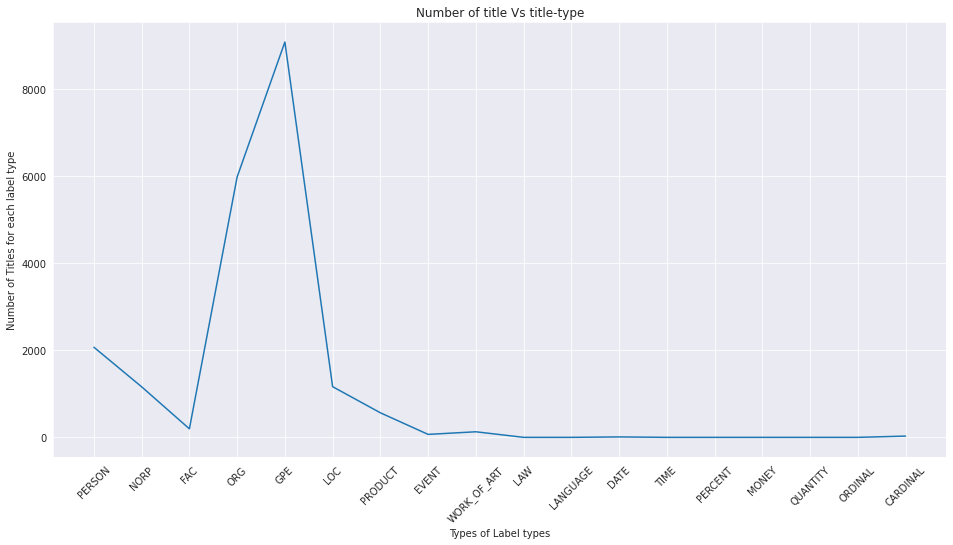

In [ ]:
# After discovering topics and contexts as entity we need to find NER for questions and then
# Plot those entity types of questions for each entity type of Topics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
#plt.plot(np.cumsum(np.random.randn(1000,1)))
plt.figure(figsize=(16, 8),facecolor="white")
plt.plot(labels,num_of_topics_per_label)
plt.xlabel("Types of Label types")
plt.xticks(rotation=45)
plt.ylabel("Number of Titles for each label type")
plt.title("Number of title Vs title-type")
plt.show()


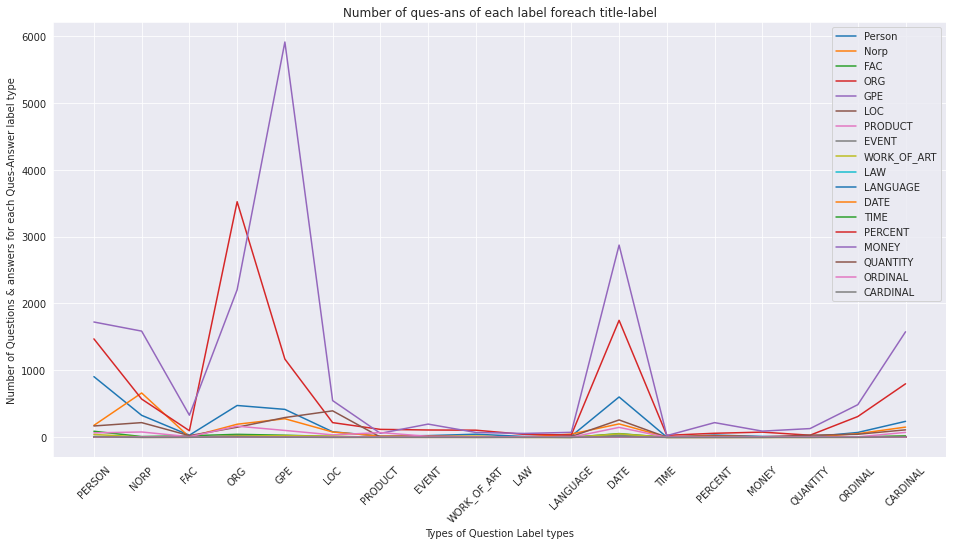

In [ ]:
#Below plot for highest 3 label types in title  
sns.set_style("darkgrid")
#plt.plot(np.cumsum(np.random.randn(1000,1)))
plt.figure(figsize=(16, 8),facecolor="white")
plt.plot(labels,num_Person_ques   ,label="Person")
plt.plot(labels,num_Norp_ques	  ,label="Norp")#num_Person_ques
plt.plot(labels,num_Fac_ques      ,label="FAC")
plt.plot(labels,num_Org_ques      ,label="ORG")
plt.plot(labels,num_Gpe_ques      ,label="GPE")
plt.plot(labels,num_Loc_ques      ,label="LOC")
plt.plot(labels,num_Product_ques  ,label="PRODUCT")
plt.plot(labels,num_Event_ques    ,label="EVENT")
plt.plot(labels,num_Workofart_ques,label="WORK_OF_ART")
plt.plot(labels,num_Law_ques      ,label="LAW")
plt.plot(labels,num_Language_ques ,label="LANGUAGE")
plt.plot(labels,num_Date_ques     ,label="DATE")
plt.plot(labels,num_Time_ques     ,label="TIME")
plt.plot(labels,num_Percent_ques  ,label="PERCENT")
plt.plot(labels,num_Money_ques    ,label="MONEY")
plt.plot(labels,num_Quantity_ques ,label="QUANTITY")
plt.plot(labels,num_Ordinal_ques  ,label="ORDINAL")
plt.plot(labels,num_Cardinal_ques ,label="CARDINAL")

plt.xlabel("Types of Question Label types")
plt.xticks(rotation=45)
plt.title("Number of ques-ans of each label foreach title-label")
plt.ylabel("Number of Questions & answers for each Ques-Answer label type")
plt.legend()
plt.show()

In [ ]:
print(len(questions[0]))
print(title[1])
print(answers_text[1])
print(answers_start[1])
print(context[1])
print(len(questions))

#Now lets calculate average and median length of questions, context and answers
#For doing this we will have to consider Unique elements only
#Its easy if we convert list to set and then back to list

set_questions=set(questions)
set_context=set(context)
#set_answers=set(answers_text)

distinct_questions=list(set_questions)
distinct_context  =list(set_context  )
#distinct_answers  =list(set_answers  )# Assuming that all answers are different and if two answers match then the questions are different
def avg_length(ram):
  length=[]
  len_avg=0
  for i in range(0,len(ram)):
    if ram[i] is not None:
      len_avg+=len(ram[i])
      length.append(len(ram[i]))
    
  len_avg=len_avg/len(ram)
  return length,len_avg

answers_text_length ,   answers_text_len_avg   =   avg_length(answers_text)
distinct_context_length   ,   distinct_context_len_avg    =   avg_length(distinct_context)
distinct_questions_length   ,   distinct_questions_len_avg    =   avg_length(distinct_questions)

40
Beyoncé
singing and dancing
207
Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny's Child. Managed by her father, Mathew Knowles, the group became one of the world's best-selling girl groups of all time. Their hiatus saw the release of Beyoncé's debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".
130319


In [ ]:
import statistics
print(max(answers_text_length))
print(statistics.median(distinct_context_length))
print(statistics.median(distinct_questions_length))

239
678
55


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


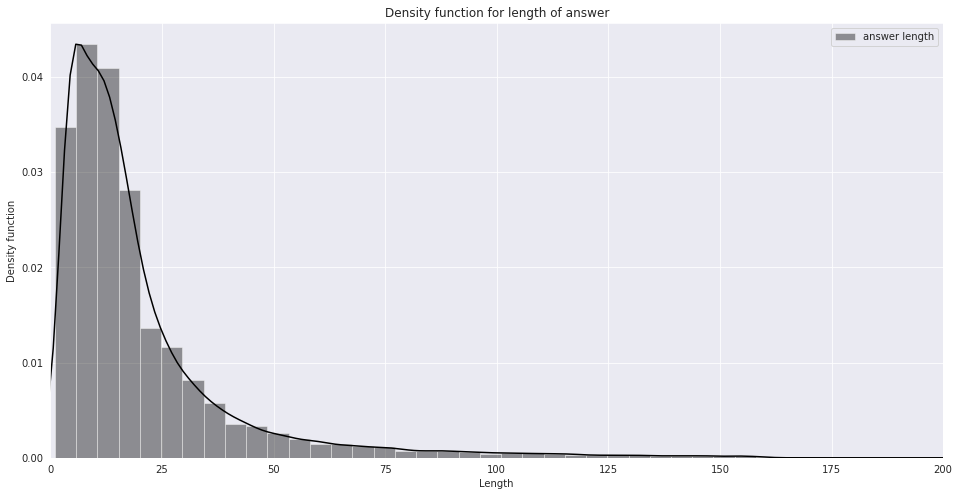

In [ ]:
# print(answers_text_length ,   answers_text_len_avg)
sns.set_style("darkgrid")
plt.figure(figsize=(16, 8),facecolor="white")
sns.distplot(answers_text_length,label="answer length", rug=False, hist=True,color="black")
#sns.distplot(distinct_context_length,label="context length", rug=False, hist=True)
#sns.distplot(distinct_questions_length,label="Question length", rug=True, hist=False)
plt.xlim(0, 200)
#plt.ylim(0.005,0.05)
plt.xlabel("Length")
# plt.xticks(rotation=45)
plt.ylabel("Density function")
plt.title("Density function for length of answer")
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


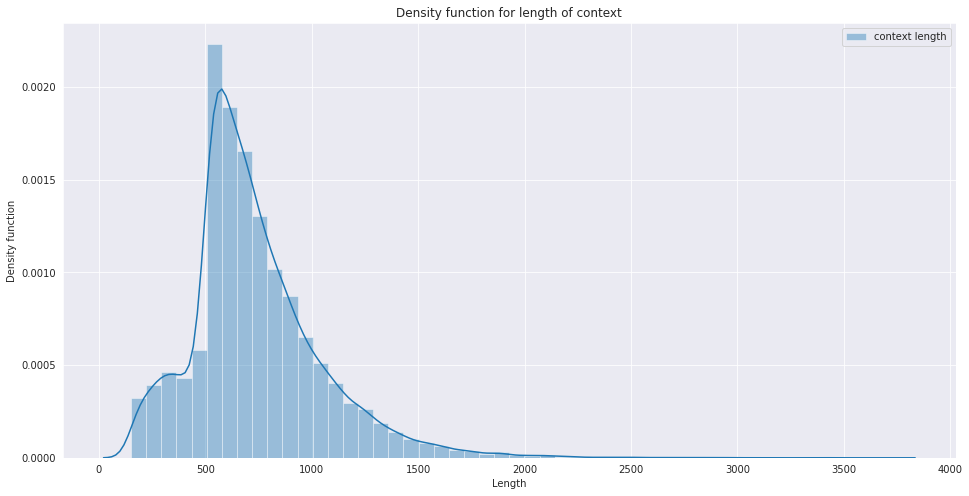

In [ ]:
# print(answers_text_length ,   answers_text_len_avg)
sns.set_style("darkgrid")
plt.figure(figsize=(16, 8),facecolor="white")
#sns.distplot(answers_text_length,label="answer length", rug=True, hist=False,color="black")
sns.distplot(distinct_context_length,label="context length", rug=False, hist=True)
#sns.distplot(distinct_questions_length,label="Question length", rug=True, hist=False)
#plt.xlim(0, 200)
#plt.ylim(0.005,0.05)
plt.xlabel("Length")
# plt.xticks(rotation=45)
plt.ylabel("Density function")
plt.title("Density function for length of context")
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


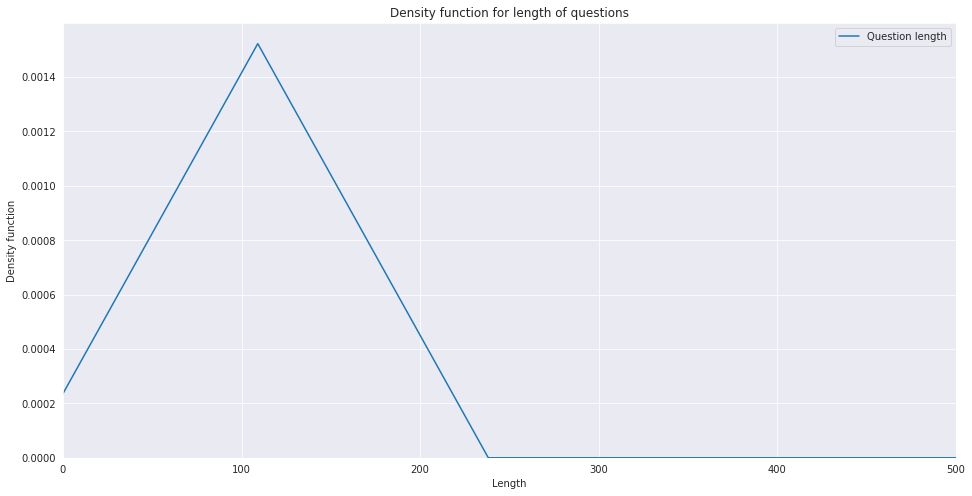

In [ ]:
# print(answers_text_length ,   answers_text_len_avg)
sns.set_style("darkgrid")
plt.figure(figsize=(16,8),facecolor="white")
#sns.distplot(answers_text_length,label="answer length", rug=True, hist=False,color="black")
#sns.distplot(distinct_context_length,label="context length", rug=False, hist=True)
sns.distplot(distinct_questions_length,label="Question length", rug=False, hist=False)
plt.xlim(0,500)
#plt.ylim(0.005,0.05)
plt.xlabel("Length")
# plt.xticks(rotation=45)
plt.ylabel("Density function")
plt.title("Density function for length of questions")
plt.legend()
plt.show()